Predicts the Annual Salary of the Employee

Dataset: https://www.kaggle.com/datasets/abdallahwagih/company-employees?resource=download

In [ ]:
import pandas as pd
data = pd.read_excel('/content/Employees.xlsx')
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [ ]:
data.shape

(689, 15)

In [ ]:
data.isna().sum()

,0
No,0
First Name,0
Last Name,0
Gender,0
Start Date,0
Years,0
Department,0
Country,0
Center,0
Monthly Salary,0


In [ ]:
data.duplicated().sum()

np.int64(0)

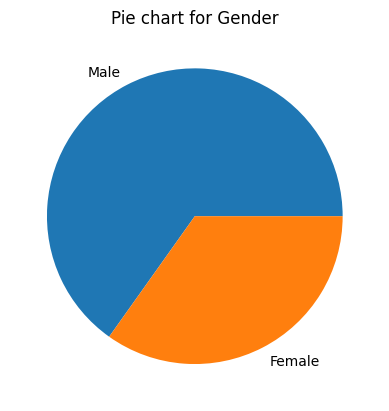

In [ ]:
import matplotlib.pyplot as plt
data['Gender'].value_counts().plot(kind='pie')
plt.title("Pie chart for Gender")
plt.ylabel("")
plt.show()

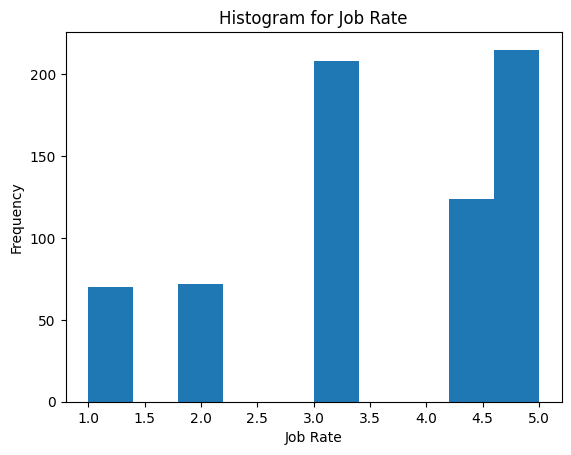

In [ ]:
plt.hist(data['Job Rate'])
plt.title("Histogram for Job Rate")
plt.xlabel("Job Rate")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data['Job Rate'].describe()

,Job Rate
count,689.000000
mean,3.586357
std,1.350125
min,1.000000
25%,3.000000
50%,3.000000
75%,5.000000
max,5.000000


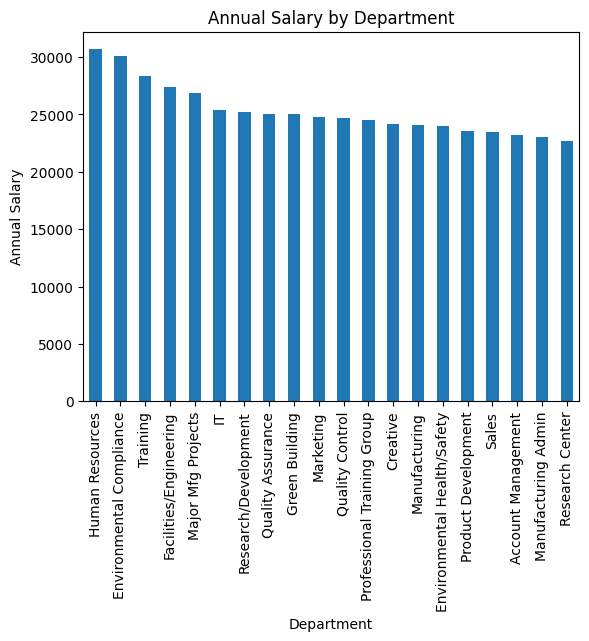

In [ ]:
data.groupby('Department')['Annual Salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Annual Salary by Department")
plt.xlabel("Department")
plt.ylabel("Annual Salary")
plt.show()

In [ ]:
data.groupby('Center')['Monthly Salary'].mean().sort_values(ascending=False)

,Monthly Salary
Center,
East,2274.021277
West,2068.672269
North,2064.811594
Main,2054.776892
South,1981.153846


In [ ]:
data['Country'].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

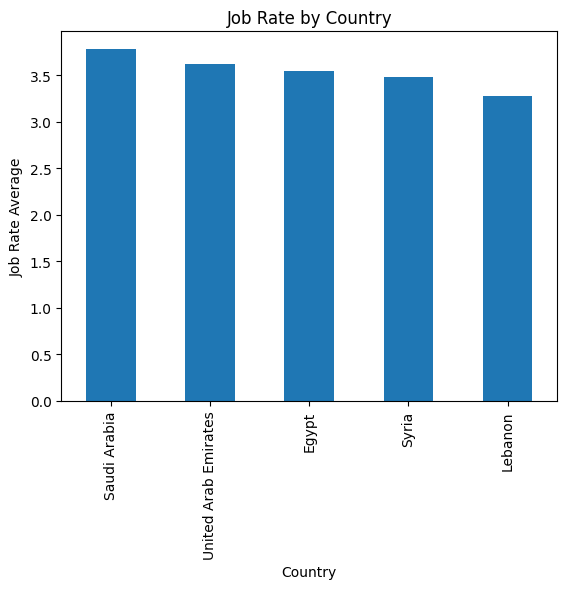

In [ ]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Job Rate by Country")
plt.xlabel("Country")
plt.ylabel("Job Rate Average")
plt.show()

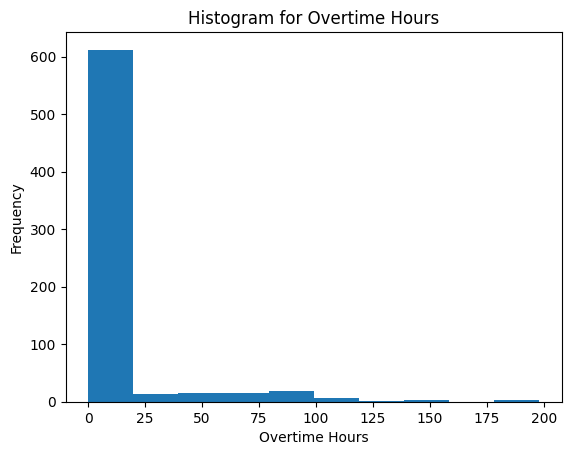

In [ ]:
plt.hist(data['Overtime Hours'])
plt.title("Histogram for Overtime Hours")
plt.xlabel("Overtime Hours")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data['Overtime Hours'].describe()

,Overtime Hours
count,689.000000
mean,13.702467
std,25.692049
min,0.000000
25%,3.000000
50%,7.000000
75%,10.000000
max,198.000000


In [ ]:
data['Annual Salary'].describe()

,Annual Salary
count,689.000000
mean,24818.420900
std,9159.470878
min,8436.000000
25%,17232.000000
50%,24924.000000
75%,32184.000000
max,41400.000000


In [ ]:
data.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [ ]:
X = data[['Years','Job Rate','Overtime Hours']]
y = data['Annual Salary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Absolute Error", mean_absolute_error(y_test, predictions))

Mean Absolute Error 8430.067095459672


In [ ]:
print("Mean Squared Error", mean_squared_error(y_test, predictions))

Mean Squared Error 91015065.61629677


In [ ]:
print("R Squared", r2_score(y_test, predictions))

R Squared -0.03673645757080446


In [ ]:
# Predict for a new employee
sample_employee = pd.DataFrame([{
    'Years': 2,
    'Job Rate': 3,
    'Overtime Hours': 43,
}])

# Fill in any missing columns (in case)
for col in X.columns:
    if col not in sample_employee.columns:
        sample_employee[col] = 0

# Scale and predict
sample_scaled = scaler.transform(sample_employee)
predicted_score = model.predict(sample_scaled)

print("Annual Salary of the Employee is", predicted_score[0])

Annual Salary of the Employee is 23394.38163908355
